# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycodestyle_magic
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import time

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [2]:
#%%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.cluster_centers_ = None

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.cluster_centers_ = np.empty((self.k, X.shape[1]))

        # Your Code Here
        if(self.init == 'random'):
            self.cluster_centers_ = X[np.random.choice(X.shape[0], replace=False, size=self.k)]
        if(self.init == 'k-means'):
            self.cluster_centers_[0] = X[np.random.choice(X.shape[0], replace=False)]
            for clust in range(1, self.k):
                dists = euclidean_distances(X, self.cluster_centers_[:clust, :]).min(axis=1)
                probs = dists / dists.sum()
                self.cluster_centers_[clust] = X[np.random.choice(X.shape[0], replace=False, p=probs)]
        tmp_cluster_centers_ = np.empty((self.k, X.shape[1]))
        for i in range(self.max_iter):
            self.labels = euclidean_distances(X, self.cluster_centers_).argmin(axis=1)
            for clust in range(self.k):
                if np.any(self.labels == clust, axis=0):
                    tmp_cluster_centers_[clust] = np.mean(X[self.labels == clust], axis=0)
                else:
                    tmp_cluster_centers_[clust] = X[np.random.choice(X.shape[0])]
            if np.all(np.abs(tmp_cluster_centers_ - self.cluster_centers_) < 0.01):
                break
            self.cluster_centers_ = tmp_cluster_centers_
        self.labels = euclidean_distances(X, self.cluster_centers_).argmin(axis=1)
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        Возвращает метку ближайшего кластера для каждого объекта
        """
        return euclidean_distances(X, self.cluster_centers_).argmin(axis=1)


class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random', batch_size=100):
        super().__init__(k, metric, max_iter, random_state, init)
        self.batch_size = batch_size

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.cluster_centers_ = np.empty((self.k, X.shape[1]))

        # Your Code Here
        if(self.init == 'random'):
            self.cluster_centers_ = X[np.random.choice(X.shape[0], replace=False, size=self.k)]
        if(self.init == 'k-means'):
            self.cluster_centers_[0] = X[np.random.choice(X.shape[0], replace=False)]
            for clust in range(1, self.k):
                dists = euclidean_distances(X, self.cluster_centers_[:clust, :]).min(axis=1)
                probs = dists / dists.sum()
                self.cluster_centers_[clust] = X[np.random.choice(X.shape[0], replace=False, p=probs)]
        tmp_cluster_centers_ = np.empty((self.k, X.shape[1]))
        for i in range(self.max_iter):
            batch_size = min(self.batch_size, X.shape[0])
            X_tmp = X[np.random.choice(X.shape[0], replace=False, size=batch_size)]
            self.labels = euclidean_distances(X_tmp, self.cluster_centers_).argmin(axis=1)
            for clust in range(self.k):
                if np.any(self.labels == clust, axis=0):
                    tmp_cluster_centers_[clust] = np.mean(X_tmp[self.labels == clust], axis=0)
                else:
                    tmp_cluster_centers_[clust] = X_tmp[np.random.choice(X_tmp.shape[0])]
            if np.all(np.abs(tmp_cluster_centers_ - self.cluster_centers_) < 0.01):
                break
            self.cluster_centers_ = tmp_cluster_centers_
        self.labels = euclidean_distances(X, self.cluster_centers_).argmin(axis=1)
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

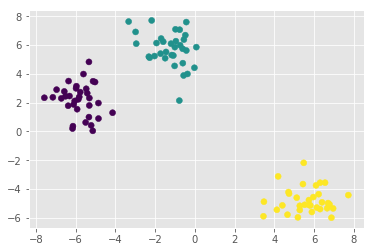

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [6]:
Clf = KMeans(n_clusters=3, init='random', max_iter=1000, n_init=1)
My_Clf = MyKmeans(k=3)
My_Clf_PP = MyKmeans(k=3, init='k-means')
My_Clf_Bch = MiniBatchKMeans(k=3)
My_Clf_PP_Bch = MiniBatchKMeans(k=3, init='k-means')

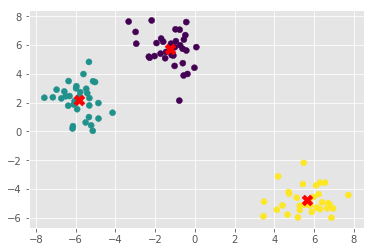

In [7]:
## Работоспособность MyKmeans
My_Clf.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=My_Clf.predict(X))
plt.scatter(My_Clf.cluster_centers_[:, 0], My_Clf.cluster_centers_[:, 1],c='r',s=120,marker='X')

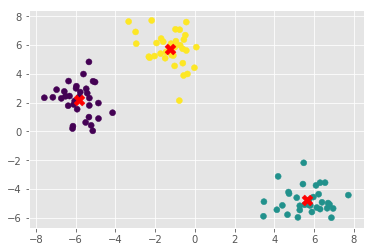

In [8]:
## Работоспособность MyKmeans++
My_Clf_PP.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=My_Clf_PP.predict(X))
plt.scatter(My_Clf_PP.cluster_centers_[:, 0], My_Clf_PP.cluster_centers_[:, 1],c='r',s=120,marker='X')

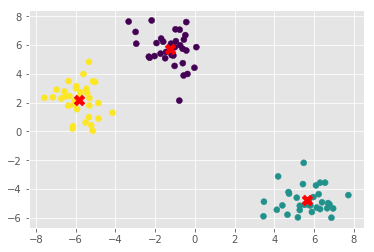

In [9]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
My_Clf_Bch.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=My_Clf_Bch.predict(X))
plt.scatter(My_Clf_Bch.cluster_centers_[:, 0], My_Clf_Bch.cluster_centers_[:, 1],c='r',s=120,marker='X')

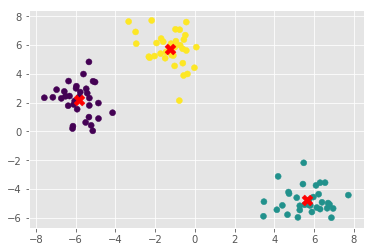

In [10]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
My_Clf_PP_Bch.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=My_Clf_PP_Bch.predict(X))
plt.scatter(My_Clf_PP_Bch.cluster_centers_[:, 0], My_Clf_PP_Bch.cluster_centers_[:, 1],c='r',s=120,marker='X')

In [11]:
n_samples=range(4000,40000,4000)

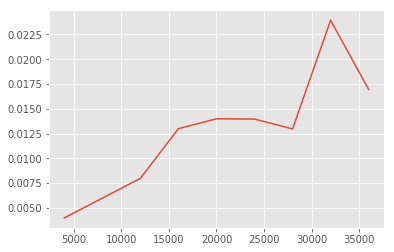

In [12]:
## Время выполнения алгоритма Kmeans из sklearn
import time
def time_gen(Clf, n_samples):
    for samples in n_samples:
        X, y = make_blobs(n_samples=samples, n_features=2, centers=3, cluster_std=1,
                          center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
        t_0 = time.time()
        Clf.fit(X)
        t_1 = time.time()-t_0
        yield t_1
time_Clf = list(time_gen(Clf, n_samples))
plt.plot(n_samples, time_Clf)

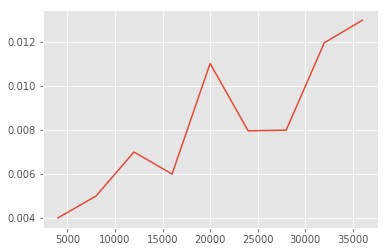

In [13]:
## Время выполнения алгоритма MyKmeans
import time
def time_gen(Clf, n_samples):
    for samples in n_samples:
        X, y = make_blobs(n_samples=samples, n_features=2, centers=3, cluster_std=1,
                          center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
        t_0 = time.time()
        Clf.fit(X)
        t_1 = time.time()-t_0
        yield t_1
time_My_Clf = list(time_gen(My_Clf, n_samples))
plt.plot(n_samples, time_My_Clf)

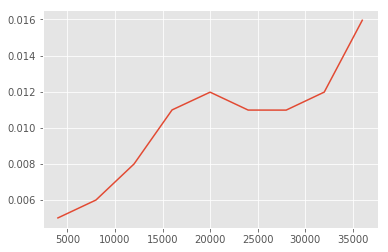

In [14]:
## Время выполнения алгоритма MyKmeans++
import time
def time_gen(Clf, n_samples):
    for samples in n_samples:
        X, y = make_blobs(n_samples=samples, n_features=2, centers=3, cluster_std=1,
                          center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
        t_0 = time.time()
        Clf.fit(X)
        t_1 = time.time()-t_0
        yield t_1
time_My_Clf_PP = list(time_gen(My_Clf_PP, n_samples))
plt.plot(n_samples, time_My_Clf_PP)

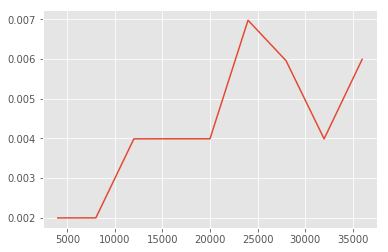

In [15]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
import time
def time_gen(Clf, n_samples):
    for samples in n_samples:
        X, y = make_blobs(n_samples=samples, n_features=2, centers=3, cluster_std=1,
                          center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
        t_0 = time.time()
        Clf.fit(X)
        t_1 = time.time()-t_0
        yield t_1
time_My_Clf_Bch = list(time_gen(My_Clf_Bch, n_samples))
plt.plot(n_samples, time_My_Clf_Bch)

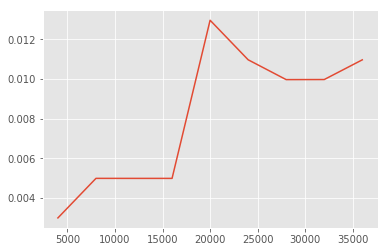

In [16]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
import time
def time_gen(Clf, n_samples):
    for samples in n_samples:
        X, y = make_blobs(n_samples=samples, n_features=2, centers=3, cluster_std=1,
                          center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
        t_0 = time.time()
        Clf.fit(X)
        t_1 = time.time()-t_0
        yield t_1
time_My_Clf_PP_Bch = list(time_gen(My_Clf_PP_Bch, n_samples))
plt.plot(n_samples, time_My_Clf_PP_Bch)

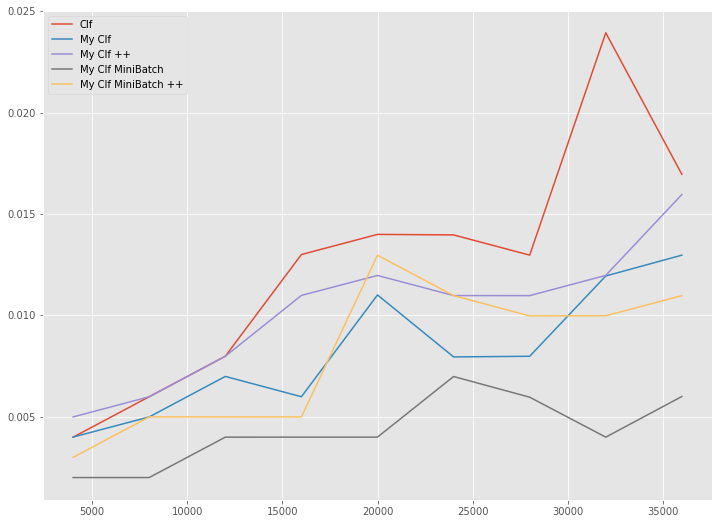

In [18]:
fig = plt.figure(figsize=(12,9))
plt.plot(n_samples, time_Clf, label = "Clf")
plt.plot(n_samples, time_My_Clf, label = "My Clf")
plt.plot(n_samples, time_My_Clf_PP, label = "My Clf ++")
plt.plot(n_samples, time_My_Clf_Bch, label = "My Clf MiniBatch")
plt.plot(n_samples, time_My_Clf_PP_Bch, label = "My Clf MiniBatch ++")
plt.legend()

Видно, что реализация My_Clf работает быстрее Clf

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [27]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [28]:
df_sns.drop(["gradyear","gender","age","friends"],axis=1,inplace=True)

In [29]:
X = ((df_sns - df_sns.mean()) / df_sns.std()).values

In [30]:
My_Clf = MyKmeans(k=9)
My_Clf_PP = MyKmeans(k=9, init='k-means')
My_Clf_Bch = MiniBatchKMeans(k=9)
My_Clf_PP_Bch = MiniBatchKMeans(k=9, init='k-means')

In [43]:
## MyKMeans
Clf = My_Clf
%time Clf.fit(X)
words = df_sns.columns
for i, clst_cntr in enumerate(Clf.cluster_centers_):
    print(f'Cluster {i+1}')
    print('size: ', Clf.labels[Clf.labels == i].size)
    print('words: ', list(words[np.argsort(clst_cntr)[-5:]]),'\n')

Wall time: 55.8 ms
Cluster 1
size:  1756
words:  ['football', 'baseball', 'basketball', 'sports', 'cheerleading'] 

Cluster 2
size:  476
words:  ['shopping', 'football', 'basketball', 'sports', 'soccer'] 

Cluster 3
size:  18690
words:  ['sexy', 'bible', 'band', 'blonde', 'marching'] 

Cluster 4
size:  2384
words:  ['kissed', 'hair', 'softball', 'drugs', 'die'] 

Cluster 5
size:  448
words:  ['abercrombie', 'sports', 'basketball', 'football', 'tennis'] 

Cluster 6
size:  1837
words:  ['jesus', 'church', 'god', 'volleyball', 'dance'] 

Cluster 7
size:  2070
words:  ['hollister', 'clothes', 'mall', 'cute', 'shopping'] 

Cluster 8
size:  1812
words:  ['hollister', 'baseball', 'football', 'swimming', 'soccer'] 

Cluster 9
size:  527
words:  ['rock', 'jesus', 'bible', 'god', 'church'] 



In [44]:
## MyKMeans++
Clf = My_Clf_PP
%time Clf.fit(X)
words = df_sns.columns
for i, clst_cntr in enumerate(Clf.cluster_centers_):
    print(f'Cluster {i+1}')
    print('size: ', Clf.labels[Clf.labels == i].size)
    print('words: ', list(words[np.argsort(clst_cntr)[-5:]]),'\n')

Wall time: 114 ms
Cluster 1
size:  19144
words:  ['baseball', 'soccer', 'marching', 'tennis', 'blonde'] 

Cluster 2
size:  188
words:  ['music', 'death', 'kissed', 'die', 'rock'] 

Cluster 3
size:  744
words:  ['drunk', 'sex', 'kissed', 'hair', 'drugs'] 

Cluster 4
size:  3409
words:  ['hot', 'cute', 'shopping', 'rock', 'mall'] 

Cluster 5
size:  292
words:  ['football', 'shopping', 'basketball', 'softball', 'volleyball'] 

Cluster 6
size:  1565
words:  ['shopping', 'cute', 'football', 'drunk', 'clothes'] 

Cluster 7
size:  643
words:  ['death', 'church', 'bible', 'jesus', 'god'] 

Cluster 8
size:  1833
words:  ['softball', 'volleyball', 'swimming', 'sports', 'basketball'] 

Cluster 9
size:  2182
words:  ['marching', 'shopping', 'band', 'dance', 'music'] 



In [45]:
## MyKMeans с MiniBatchMyKMeans
Clf = My_Clf_Bch
%time Clf.fit(X)
words = df_sns.columns
for i, clst_cntr in enumerate(Clf.cluster_centers_):
    print(f'Cluster {i+1}')
    print('size: ', Clf.labels[Clf.labels == i].size)
    print('words: ', list(words[np.argsort(clst_cntr)[-5:]]),'\n')

Wall time: 17 ms
Cluster 1
size:  3387
words:  ['shopping', 'sex', 'music', 'cheerleading', 'hair'] 

Cluster 2
size:  1173
words:  ['death', 'dance', 'god', 'sports', 'football'] 

Cluster 3
size:  746
words:  ['bible', 'blonde', 'music', 'sports', 'basketball'] 

Cluster 4
size:  43
words:  ['music', 'mall', 'kissed', 'football', 'rock'] 

Cluster 5
size:  621
words:  ['tennis', 'marching', 'bible', 'blonde', 'hot'] 

Cluster 6
size:  606
words:  ['sports', 'cute', 'death', 'band', 'swimming'] 

Cluster 7
size:  22440
words:  ['jesus', 'god', 'marching', 'dress', 'tennis'] 

Cluster 8
size:  306
words:  ['blonde', 'church', 'rock', 'mall', 'sexy'] 

Cluster 9
size:  678
words:  ['blonde', 'god', 'death', 'drunk', 'sports'] 



In [46]:
## MyKMeans++ с MiniBatchMyKMeans
Clf = My_Clf_PP_Bch
%time Clf.fit(X)
words = df_sns.columns
for i, clst_cntr in enumerate(Clf.cluster_centers_):
    print(f'Cluster {i+1}')
    print('size: ', Clf.labels[Clf.labels == i].size)
    print('words: ', list(words[np.argsort(clst_cntr)[-5:]]),'\n')

Wall time: 78.8 ms
Cluster 1
size:  105
words:  ['soccer', 'rock', 'baseball', 'dress', 'football'] 

Cluster 2
size:  24412
words:  ['music', 'basketball', 'drunk', 'tennis', 'softball'] 

Cluster 3
size:  1621
words:  ['tennis', 'marching', 'bible', 'blonde', 'sexy'] 

Cluster 4
size:  650
words:  ['basketball', 'football', 'clothes', 'abercrombie', 'cheerleading'] 

Cluster 5
size:  1686
words:  ['kissed', 'clothes', 'music', 'mall', 'death'] 

Cluster 6
size:  680
words:  ['sports', 'dress', 'baseball', 'soccer', 'football'] 

Cluster 7
size:  751
words:  ['church', 'band', 'music', 'god', 'marching'] 

Cluster 8
size:  12
words:  ['hair', 'basketball', 'drugs', 'kissed', 'sports'] 

Cluster 9
size:  83
words:  ['hot', 'basketball', 'shopping', 'cute', 'sexy'] 



## Вывод

Во всех случаях наблюдается относительно большой класс, по всей видимости с базовыми атрибутами ученика старшей школы.

Классы среднего размера лучше всего интерпретируются и хорошо совпадают для разных классификаторов.
Очень хорошо выделяются классы спортсменов и религиозных учеников. Неплохо выделяется класс "шмоточников", но зачастую перемешивается с классом спортсменов. Остальные классы не так выражены, видимо потому что алкоголю и наркотикам подвержены все в приблизительно равной степени, а может выборка недостаточная.

В среднем, MiniBatch классификаторы более склонны к выделению кластеров малого размера, что вполне логично с учетом особенности алгоритма. В данном случае такие классы в основном ничего интересного не несут и являются шумом, так как при повторном запуске классификатора зачастую пропадают.

Однако MiniBatch быстрее, что также логично.

В целом, если позволяют мощности и объем данных, то конечно лучше использовать K-Means++, так как он является наиболее точным.

